In [18]:
#import sys
#sys.path.append('../unseen')

import matplotlib.pyplot as plt
import geopandas as gp
import regionmask
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

#import spatial_selection

The Australian Bureau of Agricultural and Resource Economics and Sciences (ABARES) defines a set of [Australian broadacre zones and regions](https://apps.agriculture.gov.au/agsurf/regions.html). The relevant shapefiles can be downloaded from:  
https://www.agriculture.gov.au/abares/research-topics/surveys/farm-survey-data

Here's an image showing how vegetation maps onto the wheat/sheep region:  
https://www.agriculture.gov.au/sites/default/files/images/ag-snapshot-2021-2-01.jpg

In [2]:
abares = gp.read_file('../abares_regions.zip')
abares

,aagis,class,name,zone,geometry
0,111,111,NSW Far West,Pastoral,"POLYGON ((146.37539 -28.99878, 146.94501 -28.9..."
1,121,121,NSW North West Slopes and Plains,Wheat Sheep,"POLYGON ((150.29716 -28.54252, 150.29783 -28.5..."
2,122,122,NSW Central West,Wheat Sheep,"POLYGON ((149.02819 -30.60890, 149.05246 -30.6..."
3,123,123,NSW Riverina,Wheat Sheep,"POLYGON ((145.34428 -32.68249, 145.33056 -32.7..."
4,131,131,NSW Tablelands (Northern Central and Southern),High Rainfall,"POLYGON ((152.51672 -28.25466, 152.51610 -28.2..."
5,132,132,NSW Coastal,High Rainfall,"MULTIPOLYGON (((150.05118 -37.26355, 150.05099..."
6,221,221,VIC Mallee,Wheat Sheep,"POLYGON ((140.96768 -33.98983, 140.96827 -33.9..."
7,222,222,VIC Wimmera,Wheat Sheep,"POLYGON ((141.99493 -35.64500, 141.99495 -35.6..."
8,223,223,VIC Central North,Wheat Sheep,"POLYGON ((145.53410 -35.80522, 145.53390 -35.8..."
9,231,231,VIC Southern and Eastern Victoria,High Rainfall,"MULTIPOLYGON (((146.29518 -39.15886, 146.29331..."


In [3]:
cafe_file = '/g/data/xv83/ds0092/CAFE/forecasts/f6/WIP/c5-d60-pX-f6-19900501/ZARR/atmos_isobaric_daily.zarr.zip'

In [6]:
cafe = xr.open_zarr(cafe_file)
cafe

<xarray.Dataset>
Dimensions:         (ensemble: 96, lat: 90, latb: 91, level: 21, lon: 144, lonb: 145, nv: 2, time: 3653)
Coordinates: (12/14)
    area            (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    average_DT      (time) timedelta64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
    average_T1      (time) datetime64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
    average_T2      (time) datetime64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
  * ensemble        (ensemble) int64 1 2 3 4 5 6 7 8 ... 89 90 91 92 93 94 95 96
  * lat             (lat) float64 -89.49 -87.98 -85.96 ... 85.96 87.98 89.49
    ...              ...
  * lon             (lon) float64 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * lonb            (lonb) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5 360.0
  * nv              (nv) float64 1.0 2.0
  * time            (time) object 1990-05-01 12:00:00 ... 2000-04-30 12:00:00
    time_bounds     (time, nv) timedelta64[ns] dask.array<chunksize=(3653, 2), meta=np.ndarray>
    zsurf           (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
Data variables: (12/38)
    DELP            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    awp             (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    evap            (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    h500            (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    hght            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    lwdn_sfc        (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    ...              ...
    u_ref           (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    ucomp           (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    v_ref           (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    vcomp           (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    vis_exopd_vl_c  (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    wvp             (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    title:      AccessOcean-AM2

In [8]:
lat_bounds = cafe['latb'].values
lon_bounds = cafe['lonb'].values

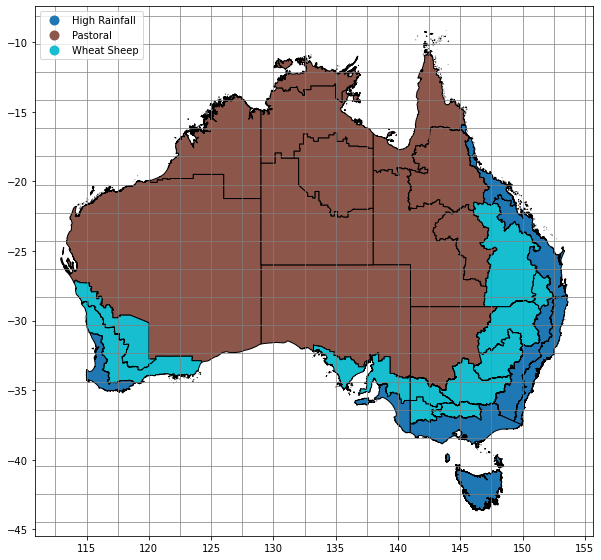

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

abares.plot(ax=ax,
            column='zone',
            legend=True,
            edgecolor='black',
            legend_kwds={'loc': 'upper left'} )

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

for lat in lat_bounds:
    if (lat > ymin) and (lat < ymax):
        ax.axhline(lat, color='0.5', linewidth=0.7)

for lon in lon_bounds:
    if (lon > xmin) and (lon < xmax):
        ax.axvline(lon, color='0.5', linewidth=0.7)

plt.show()

In [14]:
wheat_sheep = abares[abares.zone == 'Wheat Sheep']
wheat_sheep

,aagis,class,name,zone,geometry
1,121,121,NSW North West Slopes and Plains,Wheat Sheep,"POLYGON ((150.29716 -28.54252, 150.29783 -28.5..."
2,122,122,NSW Central West,Wheat Sheep,"POLYGON ((149.02819 -30.60890, 149.05246 -30.6..."
3,123,123,NSW Riverina,Wheat Sheep,"POLYGON ((145.34428 -32.68249, 145.33056 -32.7..."
6,221,221,VIC Mallee,Wheat Sheep,"POLYGON ((140.96768 -33.98983, 140.96827 -33.9..."
7,222,222,VIC Wimmera,Wheat Sheep,"POLYGON ((141.99493 -35.64500, 141.99495 -35.6..."
8,223,223,VIC Central North,Wheat Sheep,"POLYGON ((145.53410 -35.80522, 145.53390 -35.8..."
14,321,321,QLD Eastern Darling Downs,Wheat Sheep,"POLYGON ((151.24101 -26.52643, 151.24312 -26.5..."
15,322,322,QLD Western Downs and Central Highlands,Wheat Sheep,"POLYGON ((146.92819 -21.51004, 146.93123 -21.5..."
18,421,421,SA Eyre Peninsula,Wheat Sheep,"MULTIPOLYGON (((136.11366 -35.33342, 136.11484..."
19,422,422,SA Murray Lands and Yorke Peninsula,Wheat Sheep,"MULTIPOLYGON (((136.84612 -35.37357, 136.84525..."


In [15]:
lons = cafe['lon'].values
lats = cafe['lat'].values

mask = regionmask.mask_geopandas(wheat_sheep, lons, lats)

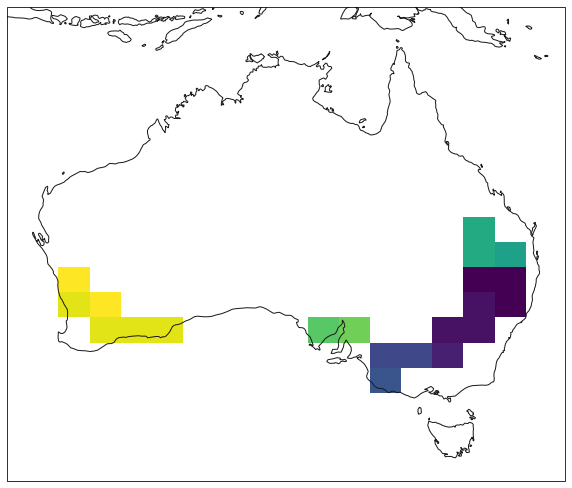

In [23]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

mask.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False,)

ax.set_extent((xmin, xmax, ymin, ymax), crs=ccrs.PlateCarree())

ax.coastlines(color="0.1")

plt.show()